In [85]:
import FinanceDataReader as fdr

df = fdr.DataReader('005930', '1990-01-01', '2016-01-01')

# close는 수정종가로 처리된 데이터임

returns = 100 * df['Close'].pct_change().dropna()
returns

Date
1996-10-14   -0.330579
1996-10-15   -4.145937
1996-10-16    0.259516
1996-10-17   -0.258844
1996-10-18    0.605536
                ...   
2015-12-23    0.232198
2015-12-24   -0.772201
2015-12-28   -1.478599
2015-12-29   -0.947867
2015-12-30    0.478469
Name: Close, Length: 4853, dtype: float64

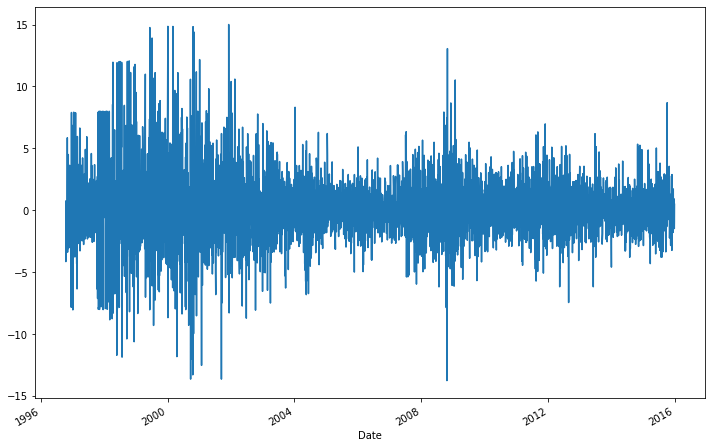

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
returns.plot()
plt.show()

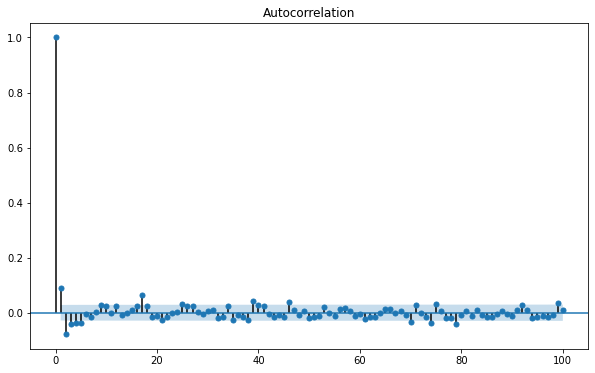

In [87]:
# 수익률 시계열의 상관관계 특성
# 수익률 자체는 자기상관관계가 없다.
# 수익률의 크기는 강한 자기상관관계가 있다.

from statsmodels.graphics.tsaplots import plot_acf

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
plot_acf(returns - returns.mean(), lags=100, ax=ax)
plt.show()


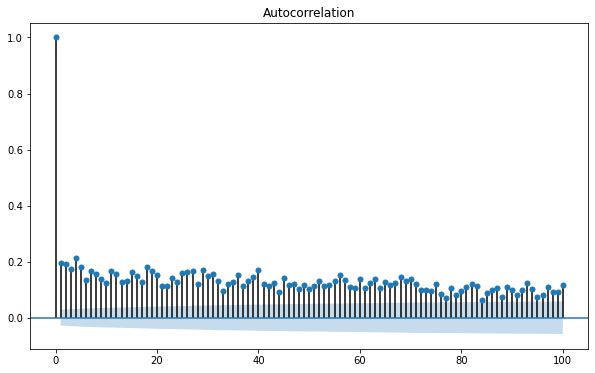

In [88]:
# 수익률의 크기는 강한 자기상관관계가 있다.
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
plot_acf((returns - returns.mean())**2, lags=100, ax=ax)
plt.show()

# 수익률 시계열의 변동성 특성

* 변동성 클러스터링(clustering)

    - 일단 변동성이 높아지면 일정기간동안 변동성이 높게 유지된다.
    - Conditional Heteroskedasticity 특성: 변동성이 이전 시간까지의 변동성 정보에 의존한다.
    - E\[rt] = µ
    
    - Var\[rt] = E\[(rt−µ)2 ∣ r1,…,rt−1]
 
* 변동성 변화는 정상(stationary) 특성을 가진다

    - 변동성의 변동성(volatility of volatility)는 일정하게 유지된다.

* 레버리지 효과(leverage effect)

    - 변동성이 증가할 때는 빠르게 증가하고 감소할 때는 천천히 감소한다

* AutoRegressive Conditional Heteroskedasticity (ARCH)

    - 1982년에 Engle 제안
    - rt = μ + ϵt
    - ϵt = σt * et
    - σ2t = ω + α1*ϵ2t−1 + ⋯ + αp*ϵ2t−p
 
* 여기에서

    - et  : 가우시안 백색 잡음
    - ϵt  :  σt  크기로 스케일링된 실제 innovation 과정
    
* ARCH 모형의 가장 특이한 점은 innovation 과정의 변동성  σ2 이 이전 시간의 innovation 과정의 실현(Realized) 샘플  ϵ2t−1,…,ϵ2t−p  에 의존하는 되먹임(feedback) 형태를 가진다는 점이다.

# Lagrange Multiplier Test

- 분산이 자기 상관관계를 가지는지 확인하기 위한 검정

- 귀무 가설 : (rt−μ)2 = ϵ2t  를  ϵ2t−1, ϵ2t−2, …, ϵ2t−m  으로 회귀분석한 계수들이 모두 0

In [89]:
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_arch

lm, lmpval, fval, fpval = het_arch(returns - returns.mean())
lmpval

3.629357616097285e-130

# ARCH(1) 모형

- rt = μ + ϵt
- ϵt = σt * et
- σ2t = ω + α1*ϵ2t−1

- 무조건부 평균(unconditional mean)은 0
    - E\[ϵt]=E\[E\[ϵt∣r1, …, rt−1]]=E\[σE\[ϵt]]=0
 
- 무조건부 분산(unconditional variance)은  ω/(1−α1) 
    - Var\[ϵt]=E\[ϵ2t]  
            = E\[E\[σ2ϵ2t∣r1, …, rt−1]]  
            = E\[ω + α1ϵ2t−1]  
            = ω + α1E\[ϵ2t−1]  
            = ω + α1Var\[ϵt−1]
 
- 모수 제한 조건
    1−3α21>0

# arch 파이썬 패키지를 사용한 ARCH 모형 추정

- arch 패키지의 arch_model 클래스를 사용하여 추정

- 이 클래스는 원래 GARCH를 위한 것이므로 인수 q를 0으로 설정하면 ARCH 모형

- arch 공식 문서 : https://readthedocs.org/projects/arch/downloads/pdf/latest/

- arch 소스 코드 확인 : https://arch.readthedocs.io/en/latest/index.html

In [90]:
from arch import arch_model
am1 = arch_model(returns, p=1, q=0) 
res1 = am1.fit()
print(res1.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 11824.681325392361
Iteration:      2,   Func. Count:     13,   Neg. LLF: 11770.753596297265
Iteration:      3,   Func. Count:     21,   Neg. LLF: 11676.543600296714
Iteration:      4,   Func. Count:     27,   Neg. LLF: 11655.019642594169
Iteration:      5,   Func. Count:     33,   Neg. LLF: 11637.350617773987
Iteration:      6,   Func. Count:     38,   Neg. LLF: 11634.96298590592
Iteration:      7,   Func. Count:     43,   Neg. LLF: 11634.808841519778
Iteration:      8,   Func. Count:     48,   Neg. LLF: 11634.806583647416
Iteration:      9,   Func. Count:     53,   Neg. LLF: 11634.806579300697
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 11634.806579300675
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                  Close   R-squared:      

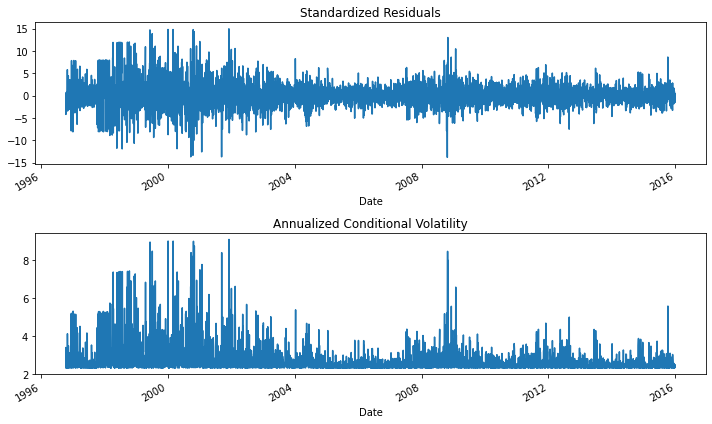

Date
2008-01-02    2.746207
2008-01-03    2.655794
2008-01-04    2.317970
2008-01-07    2.443672
2008-01-08    3.204768
                ...   
2009-12-23    2.421355
2009-12-24    2.318724
2009-12-28    2.347268
2009-12-29    2.326248
2009-12-30    2.314151
Name: cond_vol, Length: 501, dtype: float64
<class 'arch.univariate.base.ARCHModelResult'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [115]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
res1.resid.plot(ax=ax1)
ax1.set_title('Standardized Residuals')
ax2 = fig.add_subplot(212)
res1.conditional_volatility.plot(ax=ax2)
ax2.set_title('Annualized Conditional Volatility')

fig.tight_layout()
plt.show()

print(res1.conditional_volatility["2008":"2009"])
print(type(res1))
print(type(res1.conditional_volatility))
print(type(res1.conditional_volatility["2008":"2009"]))

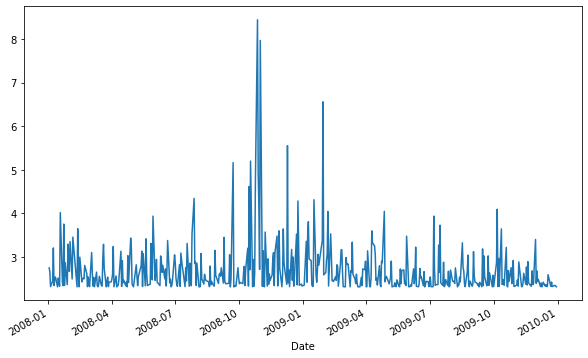

In [92]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

res1.conditional_volatility["2008":"2009"].plot(ax=ax)
plt.show()

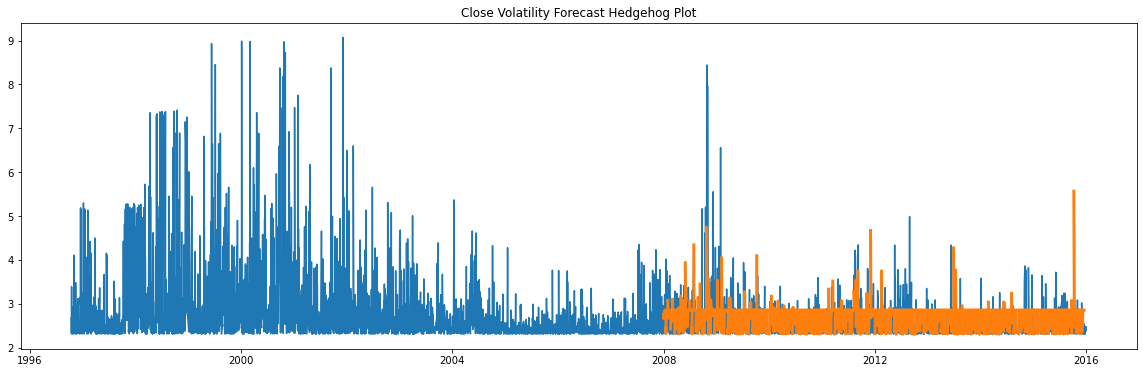

In [109]:
# Plot forecasts from estimated model : 
# start = 'date' -> An integer, datetime or str indicating the first observation to produce the forecast for

# plot_type ({'volatility', 'mean'}) – Quantity to plot, the forecast volatility or the forecast mean

# method ({'analytic', 'simulation', 'bootstrap'}) – Method to use when producing the forecast. The default is analytic. The method only affects the variance forecast generation. Not all volatility models support all methods. In particular, volatility models that do not evolve in squares such as EGARCH or TARCH do not support the ‘analytic’ method for horizons > 1.

# simulation : Number of simulations to run when computing the forecast using either simulation or bootstrap.

fig = res1.hedgehog_plot(start='2008-01-01')

# 그림 사이즈 재조정
fig.set_size_inches(20, 6)
plt.show()

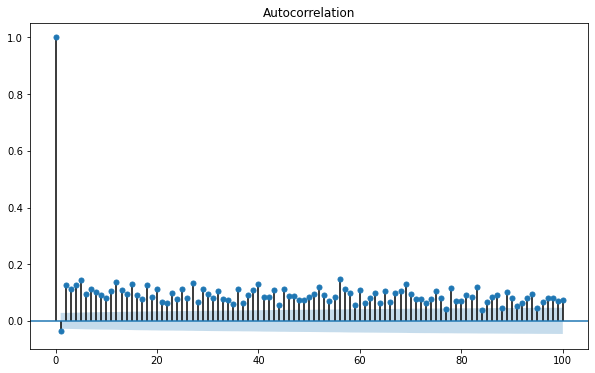

In [110]:
normalized1 = returns / res1.conditional_volatility
normalized1 = normalized1 - normalized1.mean()

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

plot_acf(normalized1**2, lags=100, ax=ax)
plt.show()

In [111]:
het_arch(normalized1)

(546.2851487460784,
 6.752449509313373e-95,
 19.12125562180024,
 2.4518274964241044e-101)

# 고차 ARCH 모형

- partial ACF를 사용하여 차수결정

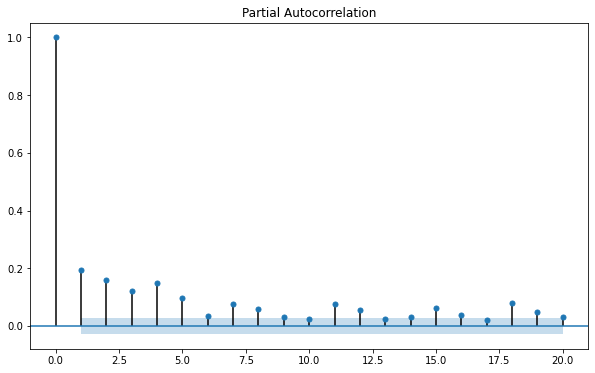

In [124]:
from statsmodels.graphics.tsaplots import plot_pacf

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

plot_pacf((returns - returns.mean())**2, lags=20, ax=ax)
plt.show()

In [125]:
am5 = arch_model(returns, p=5, q=0) 
res5 = am5.fit()
print(res5.summary())

Iteration:      1,   Func. Count:      9,   Neg. LLF: 11519.406613092537
Iteration:      2,   Func. Count:     21,   Neg. LLF: 11500.032026992685
Iteration:      3,   Func. Count:     33,   Neg. LLF: 11495.908959468452
Iteration:      4,   Func. Count:     43,   Neg. LLF: 11444.837587748658
Iteration:      5,   Func. Count:     53,   Neg. LLF: 11396.381208332517
Iteration:      6,   Func. Count:     63,   Neg. LLF: 11351.272199552292
Iteration:      7,   Func. Count:     73,   Neg. LLF: 11325.41919615437
Iteration:      8,   Func. Count:     83,   Neg. LLF: 11293.906308045825
Iteration:      9,   Func. Count:     93,   Neg. LLF: 11274.378919253511
Iteration:     10,   Func. Count:    103,   Neg. LLF: 11263.25456457679
Iteration:     11,   Func. Count:    113,   Neg. LLF: 11261.57727128436
Iteration:     12,   Func. Count:    123,   Neg. LLF: 11252.97957594454
Iteration:     13,   Func. Count:    132,   Neg. LLF: 11250.52822831428
Iteration:     14,   Func. Count:    141,   Neg. LLF: 11

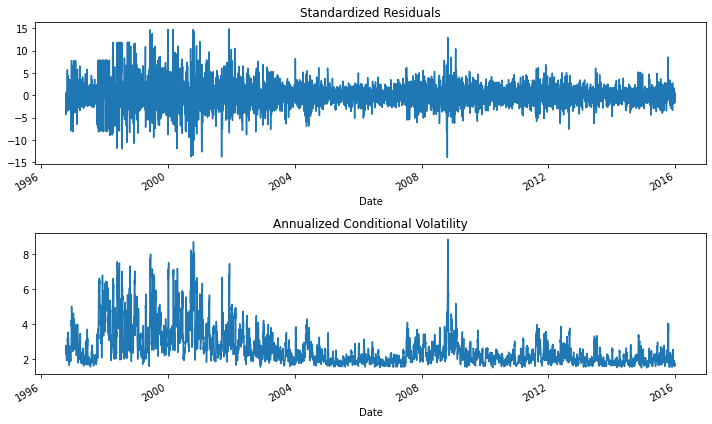

In [126]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
res5.resid.plot(ax=ax1)
ax1.set_title('Standardized Residuals')
ax2 = fig.add_subplot(212)
res5.conditional_volatility.plot(ax=ax2)
ax2.set_title('Annualized Conditional Volatility')

fig.tight_layout()
plt.show()

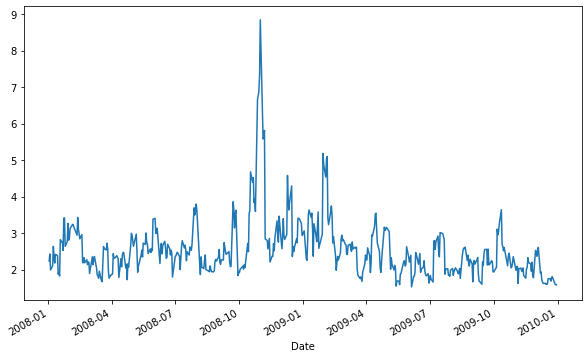

In [127]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

res5.conditional_volatility["2008":"2009"].plot(ax=ax)
plt.show()

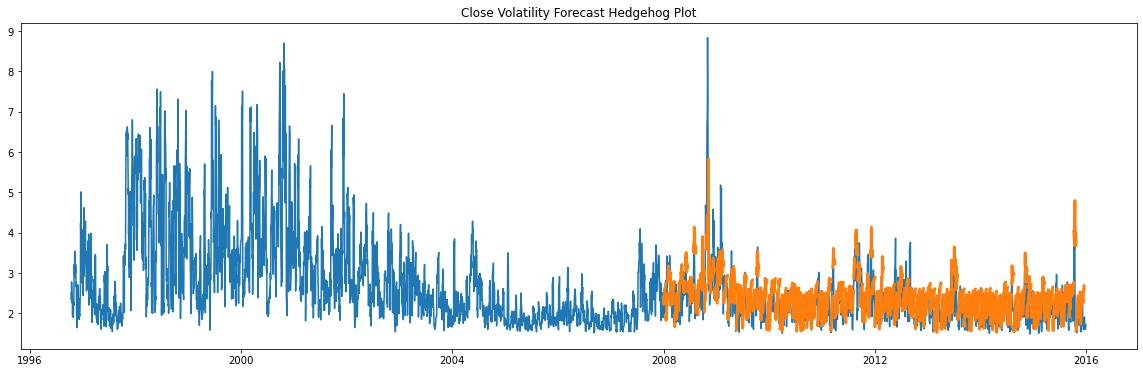

In [128]:
fig = res5.hedgehog_plot(start='2008-01-01')

# 그림 사이즈 재조정
fig.set_size_inches(20, 6)
plt.show()

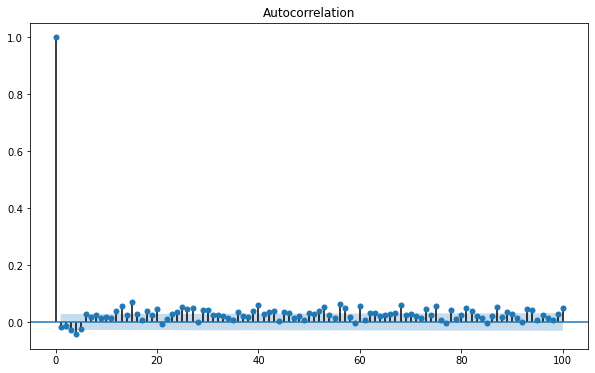

In [130]:
normalized5 = returns / res5.conditional_volatility
normalized5 = normalized5 - normalized5.mean()

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

plot_acf(normalized5**2, lags=100, ax=ax)
plt.show()

In [131]:
het_arch(normalized5)

(192.38555506913505,
 8.458831053027417e-25,
 6.219072471837584,
 2.1730533890147535e-25)

# ARCH 모형의 장점

- 단순한 수학적 모형

- 정상 신호 모형

- 변동성 clustering 표현 가능

- fai-tail 표현 가능


# ARCH 모형의 단점

- AR차수가 커짐

- 레버리지 효과 표현 불가능

- 계수 제한

- 변동성 쇼크에 대한 반응속도가 느리기 때문에 변동성 과대평가

# GARCH

- Generalized AutoRegressive Conditional Heteroskedasticity (GARCH)

- 1986년에 Bollerslev 제안

- 변동성이 이전 시간까지의 변동성 및 실현변동성 모두에 의존하는 AR모형

- ARCH 모형보다 적은 차수로 수익률 시계열 모형 가능
    - rt = μ + ϵt
    - ϵt = σt * et
    - σ2t = ω + α1ϵ2t−1 + ⋯ + αpϵ2t−p + βσ2t−1 + ⋯ + αqσ2t−q
    

In [132]:
from arch import arch_model

gam11 = arch_model(returns, p=1, q=1) 
resg11 = gam11.fit()
print(resg11.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 11082.574417346395
Iteration:      2,   Func. Count:     15,   Neg. LLF: 11082.445497086133
Iteration:      3,   Func. Count:     22,   Neg. LLF: 11075.910841678691
Iteration:      4,   Func. Count:     29,   Neg. LLF: 11070.36467217324
Iteration:      5,   Func. Count:     36,   Neg. LLF: 11065.863190353093
Iteration:      6,   Func. Count:     43,   Neg. LLF: 11054.136573287582
Iteration:      7,   Func. Count:     50,   Neg. LLF: 11040.269607947654
Iteration:      8,   Func. Count:     57,   Neg. LLF: 11039.559542400479
Iteration:      9,   Func. Count:     64,   Neg. LLF: 11038.37472547049
Iteration:     10,   Func. Count:     71,   Neg. LLF: 11037.403264321843
Iteration:     11,   Func. Count:     78,   Neg. LLF: 11036.97051287834
Iteration:     12,   Func. Count:     84,   Neg. LLF: 11036.946959282835
Iteration:     13,   Func. Count:     90,   Neg. LLF: 11036.92765261343
Iteration:     14,   Func. Count:     96,   Neg. LLF: 1

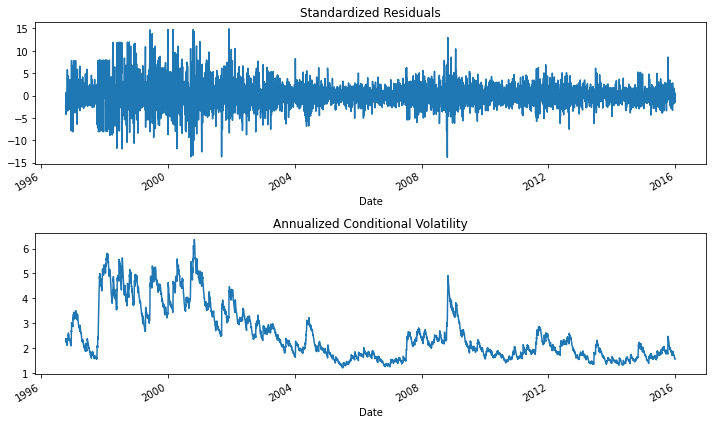

In [133]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
resg11.resid.plot(ax=ax1)
ax1.set_title('Standardized Residuals')
ax2 = fig.add_subplot(212)
resg11.conditional_volatility.plot(ax=ax2)
ax2.set_title('Annualized Conditional Volatility')

fig.tight_layout()
plt.show()

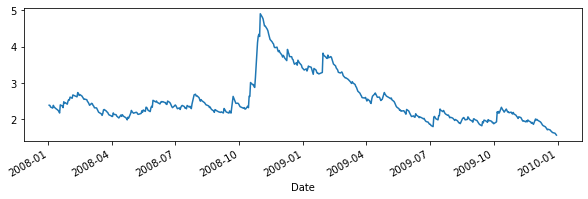

In [134]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(211)

resg11.conditional_volatility["2008":"2009"].plot(ax=ax)
plt.show()

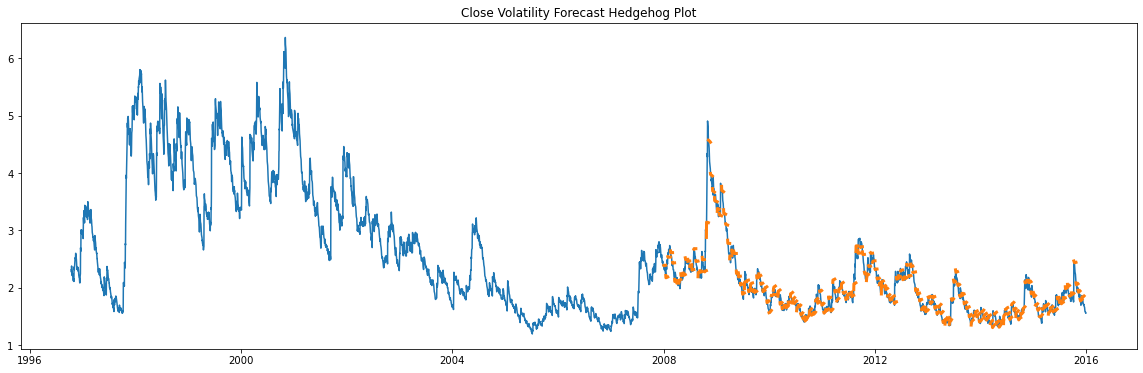

In [136]:
fig = resg11.hedgehog_plot(start='2008-01-01')

# 그림 사이즈 재조정
fig.set_size_inches(20, 6)
plt.show()

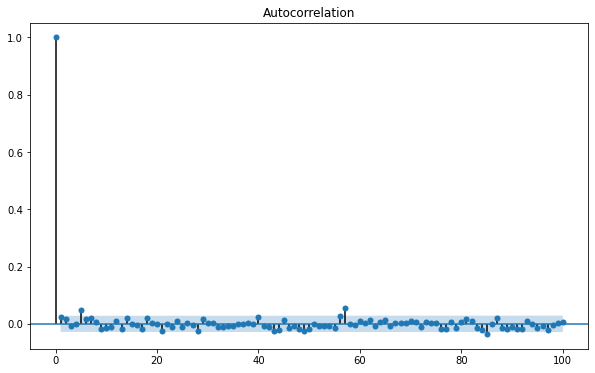

In [137]:
normalizedg11 = returns / resg11.conditional_volatility
normalizedg11 = normalizedg11 - normalizedg11.mean()

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

plot_acf(normalizedg11**2, lags=100, ax=ax)
plt.show()

In [138]:
het_arch(normalizedg11)

(40.77950210270662,
 0.13735015137590184,
 1.2764333789207916,
 0.13687469182473344)